# Orlando Criminal Activities

##### Presented by: Clark Jones, Umapathy Beema, Richard Morand <br> Dr. Spencer Lyon - Spring 2024 


Objective: <br>
Each residential area are formed by many factors that constributes to its presence. From social events like volunteering bringing a positive status in the communities to criminal activities, which leads to negative insights on neighborhoods. These different actions could make or break the community. <br>


For this experiement, we will be exploring the criminal acts in Orlando, and create different models to showcase the level of danger across the city.<br>

__Tools__ <br>
Collaboration: VSCode, Github, Discord <br>
Languages: Python, Julia <br>
Packages/Libraries: Folium (OpenStreetMap), Graphs

In [1]:
# Importing and using packages/libraries
# Pkg.update()
import Pkg
using Pkg

#import/use packages and libraries here
Pkg.add(["OpenStreetMapX","Geodesy"], io=devnull)
Pkg.add(["CSV", "DataFrames", "Conda", "PyCall", "Plots" ], io=devnull)

using OpenStreetMapX, Geodesy

using CSV, DataFrames, Conda, PyCall, Statistics
using Plots


In [2]:
# Using Pythons folium library pinpoint real criminal data

Conda.runconda(`install folium -c conda-forge -y`) # Folium Map
foli = pyimport("folium")

┌ Info: Running `conda install folium -c conda-forge -y` in root environment
└ @ Conda /Users/richard/.julia/packages/Conda/zReqD/src/Conda.jl:181


Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
  current version: 24.9.2
  latest version: 24.11.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.11.0




PyObject <module 'folium' from '/Users/richard/.julia/conda/3/x86_64/lib/python3.12/site-packages/folium/__init__.py'>

## Graph Display and Analysis



1. Group all incidents in categories: Shots, Suspicious person, vehicles, assault
2. Assign each category a color and/or icon type
3. Make Charts and Graphs with data
4. Create a Heat or Color map based on the markers
5. Maybe ad Police Stations on the map
6. Follow analysis with conclusions

#### Data Cleaning

In [3]:
# load and analyze data
data = CSV.read("Data/OPD_Officer-Involved_Shootings_20241125.csv", DataFrame)

first(data, 5)

Row,Case #,Date,Address,Incident Type,Number of Officers Involved,Officer Name,Officer Race,Ethnicity,Officer Gender,Officer Age,Officer Tenure,Number of Suspects Involved,Suspect Name,Suspect Race,Suspect Gender,Suspect Age,Suspect's Weapon,Suspect Hit,Fatal,Officer Hit,Fatal (Officer),Review Letter,Georeferenced Column
,String15,String15,String,String,Int64?,String?,String?,String31?,String31,String,String,Int64,String,String31,String7,String15,String31,String15,String15,String,String,String?,String
1,22-174307,05/18/2022,Mercy Drive and W.D. Judge Drive,Vehicle Stop,2,Marsy's Law Exempt,White/White,missing,"M,F",Marsy's Law Exempt,Marsy's Law Exempt,1,Carlos Delano Dafill Roberts Jr.,Black,M,29,Handgun,Yes,No,"No, No","No, No",https://www.orlando.gov/files/sharedassets/public/v/1/departments/public-safety/opd/open-data-docs/22-174307.pdf,POINT (-81.430522027 28.559823981)
2,18-448868,11/21/2018,9938 Universal Boulevard,Stolen Vehicle,1,"Chase, Alex",W,N,M,35,11,1,"Martinez Gonzalez, Joselito",White,M,30,Motor Vehicle,Yes,No,No,No,https://www1.cityoforlando.net/opendatadocs/saoletters/18-448869.pdf,POINT (-81.444407991 28.426330019)
3,18-219116,06/04/2018,4629 Cason Cove Drive,Attempted Suicide,1,"Sayer,Ryan",W,N,M,25,2,1,"White, Pamel",Black,F,63,Handgun,No,No,No,No,https://www1.cityoforlando.net/opendatadocs/saoletters/18-219116.pdf,POINT (-81.436934015 28.497201986)
4,20-397311,12/16/2020,"5434 Baldwin Park Street, Unit 101",Domestic Disturbance,1,missing,W,missing,M,40,14,1,"Robertson, Adam",White,M,34,Handgun,Yes,Yes,No,No,https://www.orlando.gov/files/sharedassets/public/departments/public-safety/opd/open-data-docs/ois_sao_zambito_ir-20-75.pdf,POINT (-81.31615297 28.574676001)
5,10-503738,10/26/2010,Hiawassee & SR 50,Armed Robbery,3,"Hinkles, Cedrick; Herb, Todd; Fischer, Bryan","B, W, W","N, N, N","M, M, M","30, 38, 37","6, 13, 4",1,"Soman, Acrifa",Black,M,21,Handgun,Yes,Yes,"No, No, No","No, No, No",http://www1.cityoforlando.net/opendatadocs/saoletters/10-503738.pdf,POINT (-81.475974825 28.552001109)


In [4]:
# Function to convert Georeferenced Columm to Tuple 

function convert_to_tuple(str)


    test = str[7:end]
    test = strip(test, ['(', ')'])
    test = split(test, ' ')

    return (parse(Float64, test[1]), parse(Float64, test[2]))

end


convert_to_tuple (generic function with 1 method)

In [5]:
# Coorindate convertion
location = convert_to_tuple.(data[:, "Georeferenced Column"])

point = []

for each in location
    push!(point,LatLon(each[2],each[1]))
end

data[:, "Point"] = point

78-element Vector{Any}:
 LatLon(lat=28.559823981°, lon=-81.430522027°)
 LatLon(lat=28.426330019°, lon=-81.444407991°)
 LatLon(lat=28.497201986°, lon=-81.436934015°)
 LatLon(lat=28.574676001°, lon=-81.31615297°)
 LatLon(lat=28.552001109°, lon=-81.475974825°)
 LatLon(lat=28.552194982°, lon=-81.398586976°)
 LatLon(lat=28.596308986°, lon=-81.454123826°)
 LatLon(lat=28.540632985°, lon=-81.386192991°)
 LatLon(lat=28.522822186°, lon=-81.335092645°)
 LatLon(lat=28.497712989°, lon=-81.444618041°)
 ⋮
 LatLon(lat=28.544747996°, lon=-81.397620962°)
 LatLon(lat=28.529062019°, lon=-81.307727984°)
 LatLon(lat=28.538220076°, lon=-81.389041531°)
 LatLon(lat=28.611062074°, lon=-81.429694969°)
 LatLon(lat=28.490099922°, lon=-81.462643153°)
 LatLon(lat=28.420598013°, lon=-81.269478007°)
 LatLon(lat=28.518123007°, lon=-81.306244974°)
 LatLon(lat=28.534726006°, lon=-81.388922977°)
 LatLon(lat=28.601738987°, lon=-81.413406013°)

#### Statistical Analysis
The size of our data is 78 incidents with 26 attributes. The only attributes we are concerns about are the:
- Incident Types
- Weapons Used
- Georeference Column

We referred to the Orlando Police Department (OPD) crime data set to understand the pattern in type of incidence and crimes happening in Orlando city for time period of over 5 years.
Incidence types like Traffic Stop, Armed Robbery, Traffic Stop, Stolen Vehicle, Stalking and Suspicious Person etc. Total 41 distinct Incident types are present in the data set. These 40+ distinct incidence types are classified broadly into 3 Categories namely Battery, Burglary and Vehicle Motor Incidence based on the keyword pattern occurring in the incidence types. A function was created to classify Incident types for example, pattern  “Vehicle” or “Traffic” occurring is grouped under Vehicle Motor, similarly Robbery, Burglary, Suspicious, aggravated etc. are grouped under Burglary and all other incident types are under Battery.
Similarly a function was created to classify Suspect’s weapon broadly into 3 categories. Keywords “gun”, ”Firearm” and “knife”  are classified under Arms, “Vehicle” related under Motor Vehicle and all other non-weapon type under No Arms category.
Pie chart using both Incident types and Suspect’s Weapon’s category been used to display percentage of each category.
For Incident types, Battery Incidents are highest and suspects weapon’s used highlights Arms used across incidents.

To coordinate the criminal activities, we also have concatenated police station and made some interesting discoveries. (Seen in [HeatMap](####Police-Stations-in-Orlando-with-Heat-Map))

In [6]:
suspects_weapon_cnt = combine(groupby(data,:"Suspect's Weapon"),nrow => :count)

Row,Suspect's Weapon,count
,String31,Int64
1,Handgun,40
2,Motor Vehicle,15
3,Hands/ASP,1
4,Knife,2
5,No,3
6,"Firearm, Firearm, Unknown",1
7,"Handgun, None",1
8,Yes,1
9,Firearm,4


In [7]:
incident_freq = combine(groupby(data, "Incident Type"), nrow => :Count)
sort!(incident_freq, :Count, rev=true)

Row,Incident Type,Count
,String,Int64
1,Traffic Stop,7
2,Suspicious Person,6
3,Armed Robbery,5
4,Stolen Vehicle,4
5,Attempted Suicide,4
6,Armed Subject,4
7,Battery,3
8,Shots fired,3
9,Domestic Disturbance,2


In [8]:
#function to classify Incident type broadly into 3 different categories i.e. Burglary, Battery and Vehicle Motor
function Classify_Inc_ty(IncType)
    if occursin("Vehicle",IncType) || occursin("Traffic",IncType) || occursin("Street",IncType)
        return "Vehicle"
    elseif occursin("Suspicious ",IncType) || occursin("Being",IncType) || occursin("Suicide",IncType) ||
           occursin("Ill",IncType) || occursin("Stalk",IncType) 
        return "Suspicious"
    elseif occursin("Battery",IncType) || occursin("Assault",IncType) || occursin("Domestic", IncType)
        return "Assault"
    elseif occursin("Sho",IncType) || occursin("Armed",IncType) || occursin("fire",IncType) || occursin("Homicide",IncType) || 
           occursin("Robbery",IncType) || occursin("Burglary",IncType)  || occursin("Carjack",IncType) || occursin("Murder",IncType) 
        return "Shots"
    else
        return "Other"
    end
end

Classify_Inc_ty (generic function with 1 method)

In [9]:
#Incident Type frequency 

data.Incident_Type = Classify_Inc_ty.(data."Incident Type")

Inc_cat_cnt = combine(groupby(data,:"Incident_Type"),nrow => :count)
sort(Inc_cat_cnt,:count,rev=true)

Row,Incident_Type,count
,String,Int64
1,Shots,24
2,Vehicle,18
3,Suspicious,18
4,Assault,9
5,Other,9


In [10]:
# Coder Reference Check...
# df = combine(data, [:"Incident Type", :"Incident_Type"])
# # data[!,"Incident_Type"]

# for (idx,each) in enumerate(df.Incident_Type)
#     # get!(df, each),
#     if each == "Other"
#         println(df[!,"Incident Type"][idx], " | ",each)
#     end
# end



In [11]:
#Showing pie chart and percentages of Incident types classifying 3 different categories

total = sum(Inc_cat_cnt.count)
Inc_cat_cnt.Percent = round.(Inc_cat_cnt.count ./total .* 100,digits = 1)
labels = ["$(Inc_cat_cnt.Incident_Type[i]) ($(round(Inc_cat_cnt.Percent[i],digits = 1))%)" for i in 1:nrow(Inc_cat_cnt)]
PiePer = Plots.pie(labels,Inc_cat_cnt.count,title = "Incident Type with percentages");

In [12]:
#Define a function to classify Suspect's weapons type used into 3 categoreis Gun,Motor Vehicle and No arms.
function classify_weapon(weapon)
    if occursin("gun",weapon) || occursin("Firearm",weapon) || occursin("Knife",weapon) 
        return "Arms"
    elseif occursin("Vehicle",weapon)
        return "Motor Vehicle"
    else
        return "No arms"
    end
end

classify_weapon (generic function with 1 method)

In [13]:
#Apply function classify_weapon to dataframe data and store in new column weap_categoryN
data.weap_categoryN = classify_weapon.(data."Suspect's Weapon" )
#Find the frequency count of three different categories of Suspect's weapons type used.
susp_weap_catN_cnt = combine(groupby(data,:"weap_categoryN"),nrow => :count)

Row,weap_categoryN,count
,String,Int64
1,Arms,53
2,Motor Vehicle,15
3,No arms,10


In [14]:
# Pie representating the percentage of weapons used in incidents
weap_cat_total = sum(susp_weap_catN_cnt.count)
susp_weap_catN_cnt.Percent = round.(susp_weap_catN_cnt.count ./weap_cat_total .* 100,digits = 1)
Inc_weap_lbl = ["$(susp_weap_catN_cnt.weap_categoryN[i]) ($(round(susp_weap_catN_cnt.Percent[i],digits = 1))%)" for i in 1:nrow(susp_weap_catN_cnt)]
PiePer_weap_cat = Plots.pie(Inc_weap_lbl,susp_weap_catN_cnt.count);


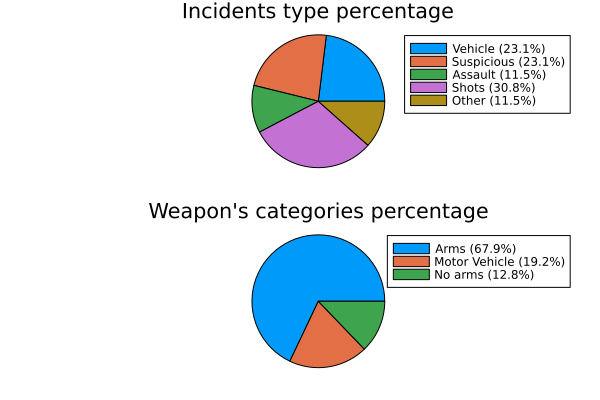

In [15]:
Plots.plot(PiePer,PiePer_weap_cat ,title = ["Incidents type percentage"  "Weapon's categories percentage"],layout=(2,1) )

In the two pie charts above, we have two different displays that are correlated with on another. <br>

Percentages were calculated for each category, and the chart displays the labels alongside their proportions, providing a clear visualization of the most frequent incident types. <br>

The first chart is a representation of the number of an Incident Type occurs. This is a general ideas of what officers are dealing with. <br>

In the Weapons Category, we algorithm used allowed us to highlight the most common weapons used in incidents. Nearly 70% of 911 calls are responding to violence with hand held weapons involved. <br>

### Map Model

In [28]:

# Initialize map

lats = [x[2] for x in location]
lons = [x[1] for x in location]

# Map Limits
min_lat = minimum(lats) 
max_lat = maximum(lats) 
@show min_lon = minimum(lons) 
@show max_lon = maximum(lons)


map = foli.Map(
    max_bounds= true,
    location = [28.601, -81.429],
    min_lat = min_lat,
    max_lat = max_lat,
    min_lon = min_lon,
    max_lon = max_lon,
    )

# Bounds Check
# foli.CircleMarker([max_lat, min_lon], tooltip="Upper Left Corner").add_to(map)
# foli.CircleMarker([min_lat, min_lon], tooltip="Lower Left Corner").add_to(map)
# foli.CircleMarker([min_lat, max_lon], tooltip="Lower Right Corner").add_to(map)
# foli.CircleMarker([max_lat, max_lon], tooltip="Upper Right Corner").add_to(map)



categories = Dict(
    "Shots" => ("red", "white", "gun"),
    "Suspicious" => ("white", "black", "user-secret"),
    "Vehicle" => ("green", "white", "car"),
    "Assault" => ("orange", "white", "people-robbery")
)

function categorize_incident(incident_type::String)
    for category in keys(categories)
        if occursin(category, incident_type)
            return categories[category]
        end
    end
    return ("gray", "white", "circle-info")  
end



# Add Crimes Markers 

for (idx,each) in enumerate(data.Point)
    color,icon_color,icon_type = categorize_incident(data[!,"Incident_Type"][idx])

    foli.Marker(

       


        location=[each.lat, each.lon],  # Access latitude and longitude using .lat and .lon
        tooltip= data[!,"Incident Type"][idx],
        popup="Case #: $(data[!,"Case #"][idx])\n
               Suspect's Weapon: $(data[!,"Suspect's Weapon"][idx])
              ",

        # icon=foli.Icon(color="darkblue", icon="building-shield", prefix="fa")
        icon=foli.Icon(color= color, icon_color=icon_color, icon=icon_type, prefix="fa")

    ).add_to(map)
end

map



min_lon = minimum(lons) = -81.476621992
max_lon = maximum(lons) = -81.239710013


PyObject <folium.folium.Map object at 0x160d895e0>

#### Visualizations
Interactive Map of Crime Locations
An interactive map was created to display crime locations, with incidents marked using category-specific colored icons. Each marker includes a tooltip showing details such as incident type, suspect weapon, and case number. Categories like "Shots" are represented by red gun icons, while "Suspicious" incidents are marked with a white-and-black user-secret icon. Vehicle-related crimes use a green car icon, and assault-related incidents are denoted by an orange robbery icon.

In [17]:
# Police Stations in Orlando with Heat Map


HeatMap = pyimport("folium.plugins").HeatMap

locations = [[each.lat, each.lon] for each in point]  

avg_lat = mean([loc[1] for loc in locations])
avg_lon = mean([loc[2] for loc in locations])
m = foli.Map(location=[avg_lat, avg_lon], zoom_start=12)

HeatMap(locations).add_to(m)

police_stations = [
    (28.5402, -81.3807, "Orlando Police Headquarters"),
    (28.5243, -81.4603, "District 2 Office"),
    (28.5463, -81.4632, "District 3 Office"),
    (28.4752, -81.3370, "Airport Division"),
    (28.6111, -81.4488, "Northwest Community Police Office"),
    (28.4238, -81.4341, "Southwest Community Police Office")         
]

for (lat, lon, name) in police_stations
    foli.Marker(
        location=[lat, lon],
        tooltip="Police Station",
        popup="<b>$name</b>",
        # icon=foli.Icon(color="darkblue", icon="shield", icon_size=(40, 40))
        icon=foli.Icon(color="darkblue", icon="building-shield", prefix="fa")
    ).add_to(m)
end
m



PyObject <folium.folium.Map object at 0x15e9b4050>

#### Police Stations in Orlando with Heat Map

To identify areas with high crime density, a heatmap overlay was added to the map. This visualization highlights regions requiring increased law enforcement presence. The heatmap was implemented using Folium's HeatMap plugin and overlays the crime density on the city's map. The area that displays the most criminal activity is where the Orlando Police department is located. This expresses the importants of having police presence.

### Graph Model

In [18]:
police_stations

6-element Vector{Tuple{Float64, Float64, String}}:
 (28.5402, -81.3807, "Orlando Police Headquarters")
 (28.5243, -81.4603, "District 2 Office")
 (28.5463, -81.4632, "District 3 Office")
 (28.4752, -81.337, "Airport Division")
 (28.6111, -81.4488, "Northwest Community Police Office")
 (28.4238, -81.4341, "Southwest Community Police Office")

In [19]:
ps_coor = [x[1:2] for x in police_stations]

police_stations_coor = [(sub[2], sub[1]) for sub in ps_coor]

6-element Vector{Tuple{Float64, Float64}}:
 (-81.3807, 28.5402)
 (-81.4603, 28.5243)
 (-81.4632, 28.5463)
 (-81.337, 28.4752)
 (-81.4488, 28.6111)
 (-81.4341, 28.4238)

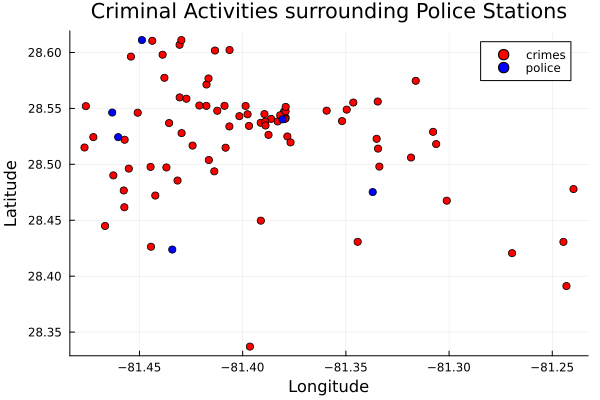

In [38]:
# location


plt = plot(location,
      xlabel="Longitude", 
     ylabel="Latitude", color=:red,
    mkrsize=5, seriestype=:scatter, label ="crimes",
    title= "Criminal Activities surrounding Police Stations"

)

plot!(police_stations_coor, color=:blue, 
      mkrsize=5, seriestype=:scatter, label ="police"

)

## Conclusion (Short Summary)

---

Using the data extracted from the City of Orlando Site, we made several discoveries that would be unknown to the without data.
First, we'd like to present the fact that have 78 known crimes that were resolved by the police departments. While observing the selected columns [incident type, suspect's weapon, georef.], we noticed there were many crime centered in one area while others are either outliers or sparsed from the central area. <br>

Each event were unique, and we wanted to know the fequency and category of each crime; showcasing the level of danger in the surrounding area. <br>


Here are some insights on each activity that would be a result to an increase of police presence.
- The concentration of weapon involved in downtown highlights the need for focused **law enforcement presence** during peak hours and in high-traffic areas.  
- The distribution of suspicious person incidents indicates potential vulnerabilities in residential areas, which could benefit from community-based policing.  
- Frequent vehicle-related crimes in commercial zones emphasize the importance of patrolling parking lots and heavily trafficked streets.  


In a scenario where we would have more crime locations, we can infer that the law enforcements were able to resolve the incidents due to being present. Without law enforcement presence, it would be implied that there crimes are unresolved due to lack of information, or time for police to make contact with. <br>

By focusing resources on identified crime hotspots and addressing specific patterns, law enforcement can take proactive measures to reduce criminal activities and enhance public safety across Orlando.

#### References: <br>
[OPD Officer-Involded Shootings](https://data.cityoforlando.net/Orlando-Police/OPD-Officer-Involved-Shootings/6kz6-6c7n/data_preview) <br>
[Folium](https://python-visualization.github.io/folium/latest/index.html) <br>
[Google Maps](https://google.com/maps/) <br>